Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


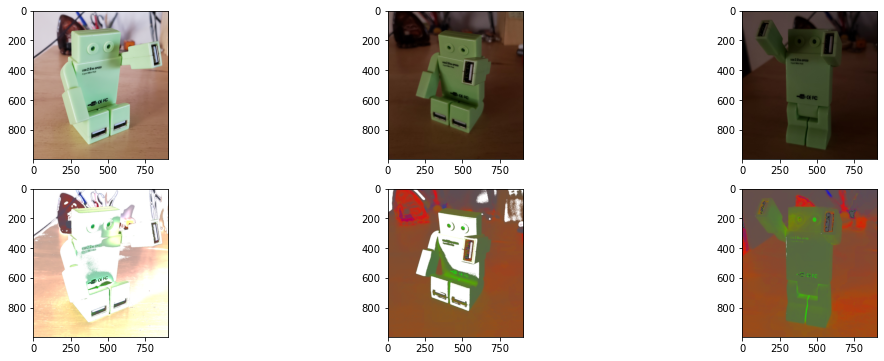

In [3]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Using matplotlib backend: Qt5Agg


def to_chromatic_cords(img):
    R = np.divide(img[:, :, 0], (img[:, :, 0]+img[:, :, 1]+img[:, :, 2]) + 0.00001)
    G = np.divide(img[:, :, 1], (img[:, :, 0]+img[:, :, 1]+img[:, :, 2]) + 0.00001)
    B = np.divide(img[:, :, 2], (img[:, :, 0]+img[:, :, 1]+img[:, :, 2]) + 0.00001)
    img_cc = np.array([R.T, G.T, B.T]).T
    return img_cc


def white_patch(img,percentile=100):
    max_0 = np.max(np.max(img[:, :, 0], axis=0))
    max_1 = np.max(np.max(img[:, :, 0], axis=1))
    R_max = max(max_0, max_1).astype(np.uint8)  # np.percentile(img[:, :, 0], percentile).astype(np.uint8)
    max_0 = np.max(np.max(img[:, :, 1], axis=0))
    max_1 = np.max(np.max(img[:, :, 1], axis=1))
    G_max = max(max_0, max_1).astype(np.uint8)  # np.percentile(img[:, :, 1], percentile).astype(np.uint8)  #
    max_0 = np.max(np.max(img[:, :, 2], axis=0))
    max_1 = np.max(np.max(img[:, :, 2], axis=1))
    B_max = max(max_0, max_1).astype(np.uint8)  # np.percentile(img[:, :, 2], percentile).astype(np.uint8)  #
    R = 255/R_max*img[:, :, 0]
    G = 255/G_max*img[:, :, 1]
    B = 255/B_max*img[:, :, 2]
    img_wp = np.round(np.stack(np.array([R, G, B]), axis=2)).astype(np.uint8)
    return img_wp



# Cargar una imagen en modo monocromático (un canal)
# img = cv.imread('imgBloque1.bmp',cv.IMREAD_GRAYSCALE)
img_claro = cv.imread('TP1\CoordCrom_1.png', cv.IMREAD_COLOR)
img_medio = cv.imread('TP1\CoordCrom_2.png', cv.IMREAD_COLOR)
img_oscuro = cv.imread('TP1\CoordCrom_3.png', cv.IMREAD_COLOR)
# img = cv.imread('G:\My Drive\AI\CURSO\computer_vision\Im_TPs\TP1\CoordCrom_2.png', cv.IMREAD_GRAYSCALE)

# imread lee la imagen en GBR, la pasamos a RGB:
img_claro = cv.cvtColor(img_claro, cv.COLOR_BGR2RGB)
img_medio = cv.cvtColor(img_medio, cv.COLOR_BGR2RGB)
img_oscuro = cv.cvtColor(img_oscuro, cv.COLOR_BGR2RGB)

a_claro = to_chromatic_cords(img_claro)
a_medio = to_chromatic_cords(img_medio)
a_oscuro = to_chromatic_cords(img_oscuro)

f, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 6))

ax[0][0].imshow(img_claro)
ax[1][0].imshow(a_claro)

ax[0][1].imshow(img_medio)
ax[1][1].imshow(a_medio)

ax[0][2].imshow(img_oscuro)
ax[1][2].imshow(a_oscuro)

plt.show()



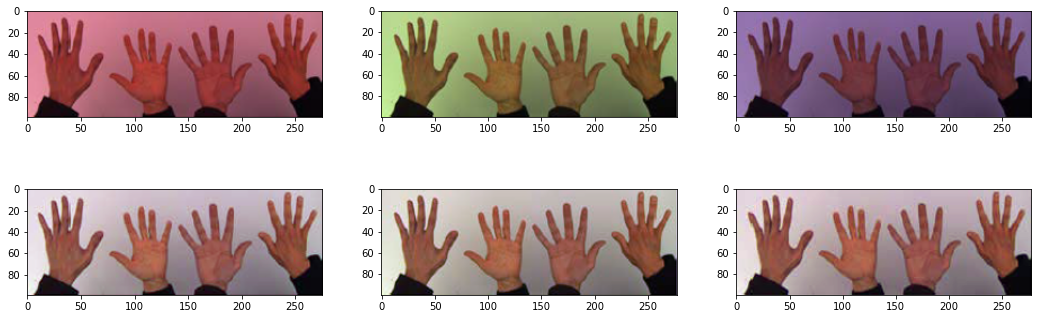

In [5]:
# White Patch

hand_red = cv.imread('TP1/test_red.png', cv.IMREAD_COLOR)
hand_green = cv.imread('TP1/test_green.png', cv.IMREAD_COLOR)
hand_blue = cv.imread('TP1/test_blue.png', cv.IMREAD_COLOR)

hand_red = cv.cvtColor(hand_red, cv.COLOR_BGR2RGB)
hand_green = cv.cvtColor(hand_green, cv.COLOR_BGR2RGB)
hand_blue = cv.cvtColor(hand_blue, cv.COLOR_BGR2RGB)

hand_red_wp = white_patch(hand_red)
hand_green_wp = white_patch(hand_green)
hand_blue_wp = white_patch(hand_blue)

f, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 6))

ax[0][0].imshow(hand_red)
ax[1][0].imshow(hand_red_wp)

ax[0][1].imshow(hand_green)
ax[1][1].imshow(hand_green_wp)

ax[0][2].imshow(hand_blue)
ax[1][2].imshow(hand_blue_wp)

plt.show()


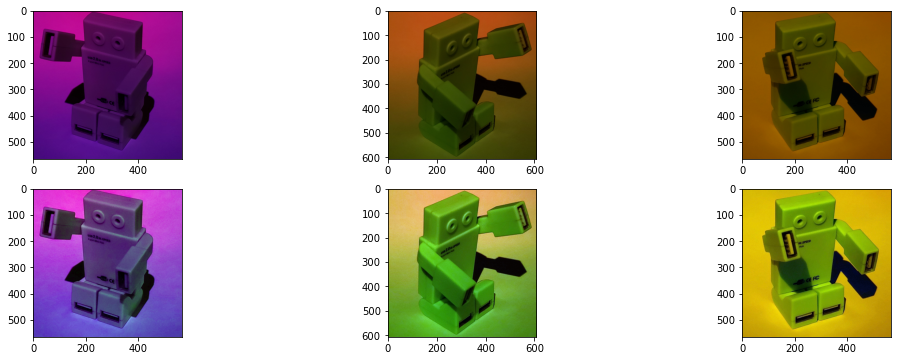

In [6]:

# White patch con Tito

img_red = cv.imread('TP1\WP_R.png', cv.IMREAD_COLOR)
img_green = cv.imread('TP1\WP_O.png', cv.IMREAD_COLOR)
img_blue = cv.imread('TP1\WP_B.png', cv.IMREAD_COLOR)

img_red = cv.cvtColor(img_red, cv.COLOR_BGR2RGB)
img_green = cv.cvtColor(img_green, cv.COLOR_BGR2RGB)
hand_blue = cv.cvtColor(img_blue, cv.COLOR_BGR2RGB)

img_red_wp = white_patch(img_red)
img_green_wp = white_patch(img_green)
img_blue_wp = white_patch(img_blue)

f, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 6))

ax[0][0].imshow(img_red)
ax[1][0].imshow(img_red_wp)

ax[0][1].imshow(img_green)
ax[1][1].imshow(img_green_wp)

ax[0][2].imshow(img_blue)
ax[1][2].imshow(img_blue_wp)

plt.show()
